In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

file_path = '../Données/TDP.xlsx'
df = pd.read_excel(file_path)


objet = ["Ecole",'Age','Habitat','id_parcelle',"code echantillon"]

targets = ['Species', 'Moy E1_E2']

features = [col for col in df.columns if col not in objet]

df.fillna(0, inplace=True)


X = df[features]
y = df[targets]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Erreur quadratique moyenne: {mse}')

print("Prédictions:", y_pred[:5])
print("Valeurs réelles:", y_test[:5].values)


Erreur quadratique moyenne: 28.071431502681058
Prédictions: [[ 1.21       21.6045424 ]
 [ 0.65       18.67237637]
 [ 1.65       38.40632947]
 [ 4.01       58.48360012]
 [ 1.96       47.21513308]]
Valeurs réelles: [[ 2.         25.60628467]
 [ 1.         18.44006955]
 [ 0.         37.39716529]
 [ 7.         67.53186519]
 [ 3.         46.0583525 ]]


         Feature  Importance
29     Moy E1_E2    0.943478
23         N_Tot    0.013424
24            Cu    0.006961
27            Zn    0.006410
28       Species    0.003603
18       Surface    0.003592
22            MO    0.003446
21         Sable    0.003214
19        Argile    0.002466
20         Limon    0.001780
17  Enfantsparm2    0.001330
0      Nb arbres    0.001254
26            Pb    0.001144
6        Occ_Tuc    0.000898
25            Ni    0.000779
3        Occ_Ugs    0.000764
1        Occ_Nat    0.000674
10          P_eq    0.000645
13           SHI    0.000603
2         Occ_Ag    0.000599
5        Occ_Tud    0.000462
14         Temps    0.000373
4         Occ_eq    0.000345
15    Ganivelles    0.000332
16   Emplacement    0.000307
11         P_Tud    0.000300
7          P_Nat    0.000254
9          P_Ugs    0.000245
12         P_Tuc    0.000167
8           P_Ag    0.000151


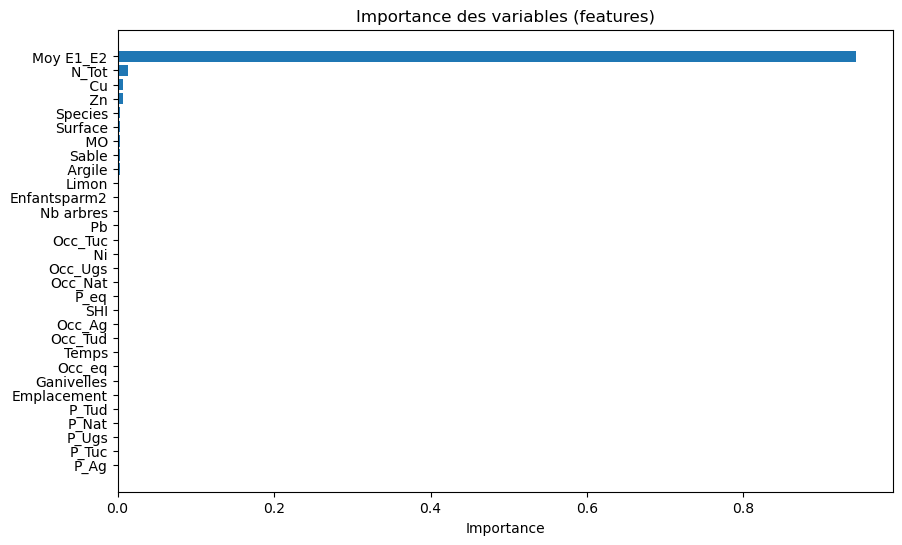

In [31]:

import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print(feature_importance_df)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Importance des variables (features)')
plt.gca().invert_yaxis() 
plt.show()
